![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)

# Benchmarks for EGFR & mutants

## Background
**EGFR (Epidermal Growth Factor Receptor) kinase** is a type of receptor tyrosine kinase that plays a significant role in cell growth, proliferation, and survival. Mutations or overexpression of EGFR have been associated with various diseases, particularly cancer.

## Benchmarking
 **EGFR Wild type**:  Targeting wild-type EGFR with small-molecule inhibitors, such as erlotinib, is an ongoing area of research in the treatment of glioblastoma. While early findings are promising, the complexity of glioblastoma biology presents challenges that require further investigation to improve treatment outcomes for patients.

 **EGFR L858R:** While EGFR TKIs initially demonstrate impressive responses in NSCLC patients with the L858R mutation, resistance to these drugs can develop over time. However, newer generations of EGFR TKIs, like osimertinib, have been developed to target these resistant mutations.

**The goal** of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.

## Description of readout 
- **Readouts**: `EGFR`, `EGFR_L858R`
- **Bioassay readout**: Percentage of inhnibition.
- **Optimization objective**: Higher the more potent.

## Data resource: 
- **Reference**: [PKIS1](https://pubmed.ncbi.nlm.nih.gov/26501955)


## Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import MultiTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[3]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [2]:
# Get the owner and organization
dataset_version = "v3"
org = "polaris"
data_name = "drewry2014_pkis1_subset"
dataset_name = f"drewry2014_pkis1_subset-{dataset_version}"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org, type="organization")
owner

HubOwner(slug='polaris', external_id=None, type='organization')

In [3]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR = f"{gcp_root}/figures"

### Load existing data
> **Attention:** \
> The original dataset is published in https://pubmed.ncbi.nlm.nih.gov/26501955 \
> 
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 


In [4]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json(DATASET_JSON)

In [6]:
dataset.table

,MOL_molhash_id,MOL_smiles,EGFR_L858R,EGFR,KIT_T6701,KIT_V560G,KIT,RET_V804L,RET_Y791F,RET,CLS_EGFR_L858R,CLS_EGFR,CLS_KIT_T6701,CLS_KIT_V560G,CLS_KIT,CLS_RET_V804L,CLS_RET_Y791F,CLS_RET
0,9c49d6b87feab0dbbf05c1183bda3268863d4b46,C#Cc1cccc(Nc2ncnc3ccc(OCCCCNCCS(C)(=O)=O)cc23)c1,97.65,85.43,9.50,4.36,7.12,11.89,31.26,18.91,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6ffee260aa54a53d5099603740cb2263b2c3baa5,C/C(Nc1ccc(S(N)(=O)=O)cc1)=C1/C(=O)Nc2ccccc21,0.10,2.48,82.45,22.44,90.86,53.92,40.31,35.87,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,d4467c413204ca95e07b7f22fbf12843a4341d0d,CC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(OCc3cccc(F)c3...,54.23,75.83,1.39,-0.41,0.40,6.73,3.42,20.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2d4306e46e566effd008af85dfaf0f293cd121ab,CC(=O)Nc1cccc(C#Cc2cncnc2Nc2ccc(OCc3cccc(F)c3)...,57.27,76.77,-0.24,5.18,2.18,9.51,13.28,11.02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,732c238264bdbc695d87b9cb4db1df207723cb5f,CC(=O)Nc1cccc(C#Cc2cncnc2Nc2ccc(OCc3cccc(F)c3)...,72.50,77.69,0.59,4.22,2.11,10.23,13.89,2.59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2bbf6ce3cabe27bde7c777676ca57ef1000b7428,c1ccc(-c2n[nH]cc2-c2ccnc(-c3ccc(OCCn4ccnc4)cc3...,24.54,5.66,3.30,4.59,11.45,13.16,19.07,9.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,25184b1012fd2920cff306df537fcd80c257d17f,c1ccc(COc2ccc(Nc3ncnc4ccc(-c5ccco5)cc34)cc2)cc1,39.41,86.14,-1.15,1.66,-0.06,2.59,1.21,2.96,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
363,ef0c0357412d5a4d4d5ea528496101828920b0b0,c1ccc(Nc2ncc(-c3ccccc3)o2)cc1,2.77,10.52,39.98,50.40,88.14,6.39,11.46,9.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
364,d751bb32949beacbfcf6e14168056fd4b354980d,c1cnn2ncc(-c3ccnc(NCCCN4CCOCC4)n3)c2c1,1.28,0.23,3.97,-1.13,5.88,2.20,0.64,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [21]:
data_cols = ["EGFR", "EGFR_L858R"]

### Create scaffold split for `EGFR & mutants` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [23]:
# scaffold split for hit identification purpose.
from splito import ScaffoldSplit

mol_col = "MOL_smiles"
split_key = "scaffold_split"
TEST_SIZE = 0.2
SEED = 846
splitter = ScaffoldSplit(
    smiles=dataset.table[mol_col].values,
    test_size=TEST_SIZE,
    random_state=SEED,
)
scaffold_split = next(splitter.split(X=dataset.table[mol_col].values))

### Check distribution of train/test set in the chemical space

  0%|          | 0/366 [00:00<?, ?it/s]

'https://storage.googleapis.com/polaris-public/polaris-recipes/org-polaris/drewry2014_pkis1_subset/figures/scaffold_split_chemspace.png'

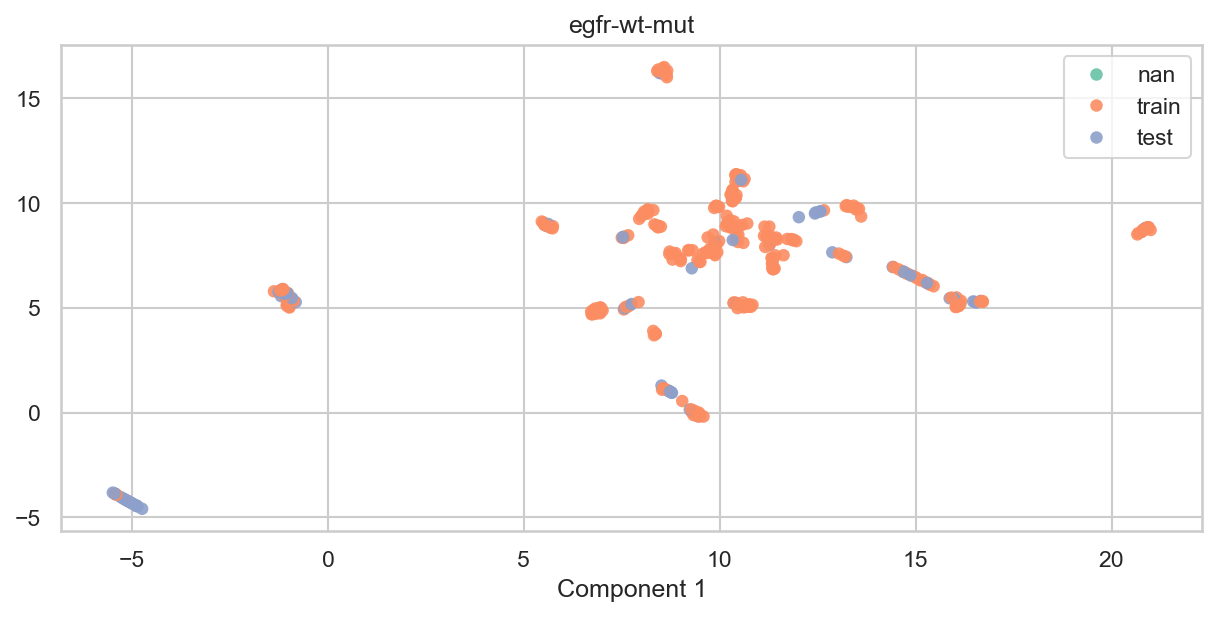

In [24]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(
    mols=dataset.table[mol_col].to_list(),
    train_test_dict={"egfr-wt-mut": scaffold_split},
)

# export the figure to remote path
from utils.auroris_utils import save_image

save_image(fig, dm.fs.join(FIGURE_DIR, f"{split_key}_chemspace.png"))

## Define multitask benchmarks for EGFR and L858R mutant with scaffold split

**Regression tasks**

In [25]:
benchmark_version = "v3"
benchmark_name = f"pkis1-egfr-wt-mut-reg-{benchmark_version}"
readme_name = "pkis1-egfr-wt-mut-reg"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ["EGFR", "EGFR_L858R"]


benchmark_reg = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "regression" for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=[
        "mean_absolute_error",
        "mean_squared_error",
        "r2",
        "spearmanr",
        "pearsonr",
        "explained_var",
    ],
    tags=["kinase", "hit-discovery", "selectivity", "multitask"],
    description="A multitask regression benchmark for kinase EGFR wild type and L858R mutant.",
    owner=owner,
    readme=load_readme(
        "org-Polaris/drewry2014_pkis1_subset/benchmarks/readme/010_pkis1-egfr-wt-mut_reg_readme.md"
    ),
)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-30 12:44:49.928 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-polaris/drewry2014_pkis1_subset/benchmarks/pkis1-egfr-wt-mut-reg-v3/benchmark.json


In [26]:
# Upload to hub
benchmark_reg.upload_to_hub(owner=owner, access="private")

✅ SUCCESS: Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis1-egfr-wt-mut-reg-v3
 


/Users/lu.zhu/miniconda3/envs/po_dataset/lib/python3.12/site-packages/yaspin/core.py:228: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(value) if value else value


{'id': 'U8kdmF5DfmBZwtuShTdNX',
 'createdAt': '2024-07-30T16:44:54.564Z',
 'deletedAt': None,
 'name': 'pkis1-egfr-wt-mut-reg-v3',
 'slug': 'pkis1-egfr-wt-mut-reg-v3',
 'description': 'A multitask regression benchmark for kinase EGFR wild type and L858R mutant.',
 'tags': ['kinase', 'hit-discovery', 'selectivity', 'multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': '0.7.9',
 'readme': "![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n\n## Background\n**EGFR (Epidermal Growth Factor Receptor) kinase** is a type of receptor tyrosine kinase that plays a significant role in cell growth, proliferation, and survival. Mutations or overexpression of EGFR have been associated with various diseases, particularly cancer.\n\n## Benchmarking\n **EGFR Wild type**:  Targeting wild-type EGFR with small-molecule inhibitors, such as erlotinib, is an ongoing area of research in the treatment of glioblastoma. Whil

**Classification task**

In [27]:
data_cols = ["CLS_EGFR", "CLS_EGFR_L858R"]
benchmark_name = f"pkis1-egfr-wt-mut-cls-{benchmark_version}"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_cls = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "classification" for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="pr_auc",
    metrics=["accuracy", "f1", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["kinase", "hit-discovery", "selectivity", "multitask"],
    description="A multitask classification benchmark for kinase EGFR wild type and L858R mutant.",
    owner=owner,
    readme=load_readme(
        "org-Polaris/drewry2014_pkis1_subset/benchmarks/readme/011_pkis1-egfr-wt-mut_cls_readme.md"
    ),
)
path = benchmark_cls.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-30 12:44:58.281 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-polaris/drewry2014_pkis1_subset/benchmarks/pkis1-egfr-wt-mut-cls-v3/benchmark.json


In [28]:
# Upload to hub
benchmark_cls.upload_to_hub(owner=owner, access="private")

✅ SUCCESS: Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis1-egfr-wt-mut-cls-v3
 


{'id': 'q2lvYyjA58i9Gc71F46lb',
 'createdAt': '2024-07-30T16:45:01.535Z',
 'deletedAt': None,
 'name': 'pkis1-egfr-wt-mut-cls-v3',
 'slug': 'pkis1-egfr-wt-mut-cls-v3',
 'description': 'A multitask classification benchmark for kinase EGFR wild type and L858R mutant.',
 'tags': ['kinase', 'hit-discovery', 'selectivity', 'multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': '0.7.9',
 'readme': "![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n\n## Background\n**EGFR (Epidermal Growth Factor Receptor) kinase** is a type of receptor tyrosine kinase that plays a significant role in cell growth, proliferation, and survival. Mutations or overexpression of EGFR have been associated with various diseases, particularly cancer.\n\n## Benchmarking\n **EGFR Wild type**:  Targeting wild-type EGFR with small-molecule inhibitors, such as erlotinib, is an ongoing area of research in the treatment of glioblastoma. 